 **Business Decision Modeling**
### Portfolio Problem
### Submitted by: Somya Kukreja


## **Importing required modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import datetime #  handling dates
import time # handling times
from dateutil.relativedelta import relativedelta # time difference
from matplotlib.pyplot import figure
from matplotlib import rcParams

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

### **Data Preprocessing and EDA**

As a part of the data preprocessing, we have opted for a few variables of the given data that will help us gain some insight and provide meaningful information to us. Based on variables such as the %YTD change, Beta, 20 Days Historical Volatility, EPS ttm, P/E ttm, and Dividend Yield to study the performance and trend of the stocks. We plotted graphs and observed the various trends and how volatile the stocks were, and have finally chosen the stocks wherein we could diversify our risk and expected returns.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
sample = pd.read_excel('/content/drive/Shareddrives/OPIM 5641 Project/Project 2/S&P Sectors_F.xlsx')

In [ ]:
# Check the missing value
print(sample.info())
sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          65 non-null     object 
 1   Name            65 non-null     object 
 2   Last            65 non-null     float64
 3   Wtd Alpha       65 non-null     float64
 4   YTD %Chg        65 non-null     float64
 5   1M %Chg         65 non-null     float64
 6   3M %Chg         65 non-null     float64
 7   52W %Chg        65 non-null     float64
 8   Opinion         65 non-null     object 
 9   20D Rel Str     65 non-null     float64
 10  20D His Vol     65 non-null     float64
 11  20D Avg Vol     65 non-null     int64  
 12  52W Low         65 non-null     float64
 13  52W High        65 non-null     float64
 14  Market Cap, $K  65 non-null     int64  
 15  P/E ttm         65 non-null     float64
 16  EPS ttm         65 non-null     float64
 17  Net Income(a)   65 non-null     objec

,Symbol,Name,Last,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,"Market Cap, $K",P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,CME,CME Group Inc,168.71,-16.04,-0.1595,-0.0041,0.0204,-0.1487,48% Sell,0.5738,0.4105,1966715,131.80,225.36,58244448,21.95,6.86,"2,116.50 M",0.37,3.4,0.0226
1,MKTX,Marketaxess Holdings,525.04,39.02,0.3849,0.0057,0.0878,0.5124,64% Buy,0.4882,0.4687,232680,275.49,606.45,20304132,79.78,7.26,204.90 M,0.46,2.4,0.0041
2,RE,Everest Re Group,240.20,-2.77,-0.1324,0.1721,0.0359,-0.0948,24% Buy,0.6748,0.4985,328280,157.32,294.31,9261112,17.98,11.72,"1,009.46 M",0.49,6.2,0.0294
3,PGR,Progressive Corp,92.65,26.98,0.2799,-0.0724,0.0281,0.2576,40% Buy,0.4691,0.3482,2408615,62.18,102.05,52932204,13.18,7.43,"3,970.30 M",0.54,0.4,0.0041
4,CINF,Cincinnati Financial,86.64,-6.14,-0.1760,0.0872,0.0386,-0.2029,40% Buy,0.6238,0.6959,877335,46.07,115.53,13793700,25.60,2.90,"1,997.00 M",0.55,2.4,0.0323


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

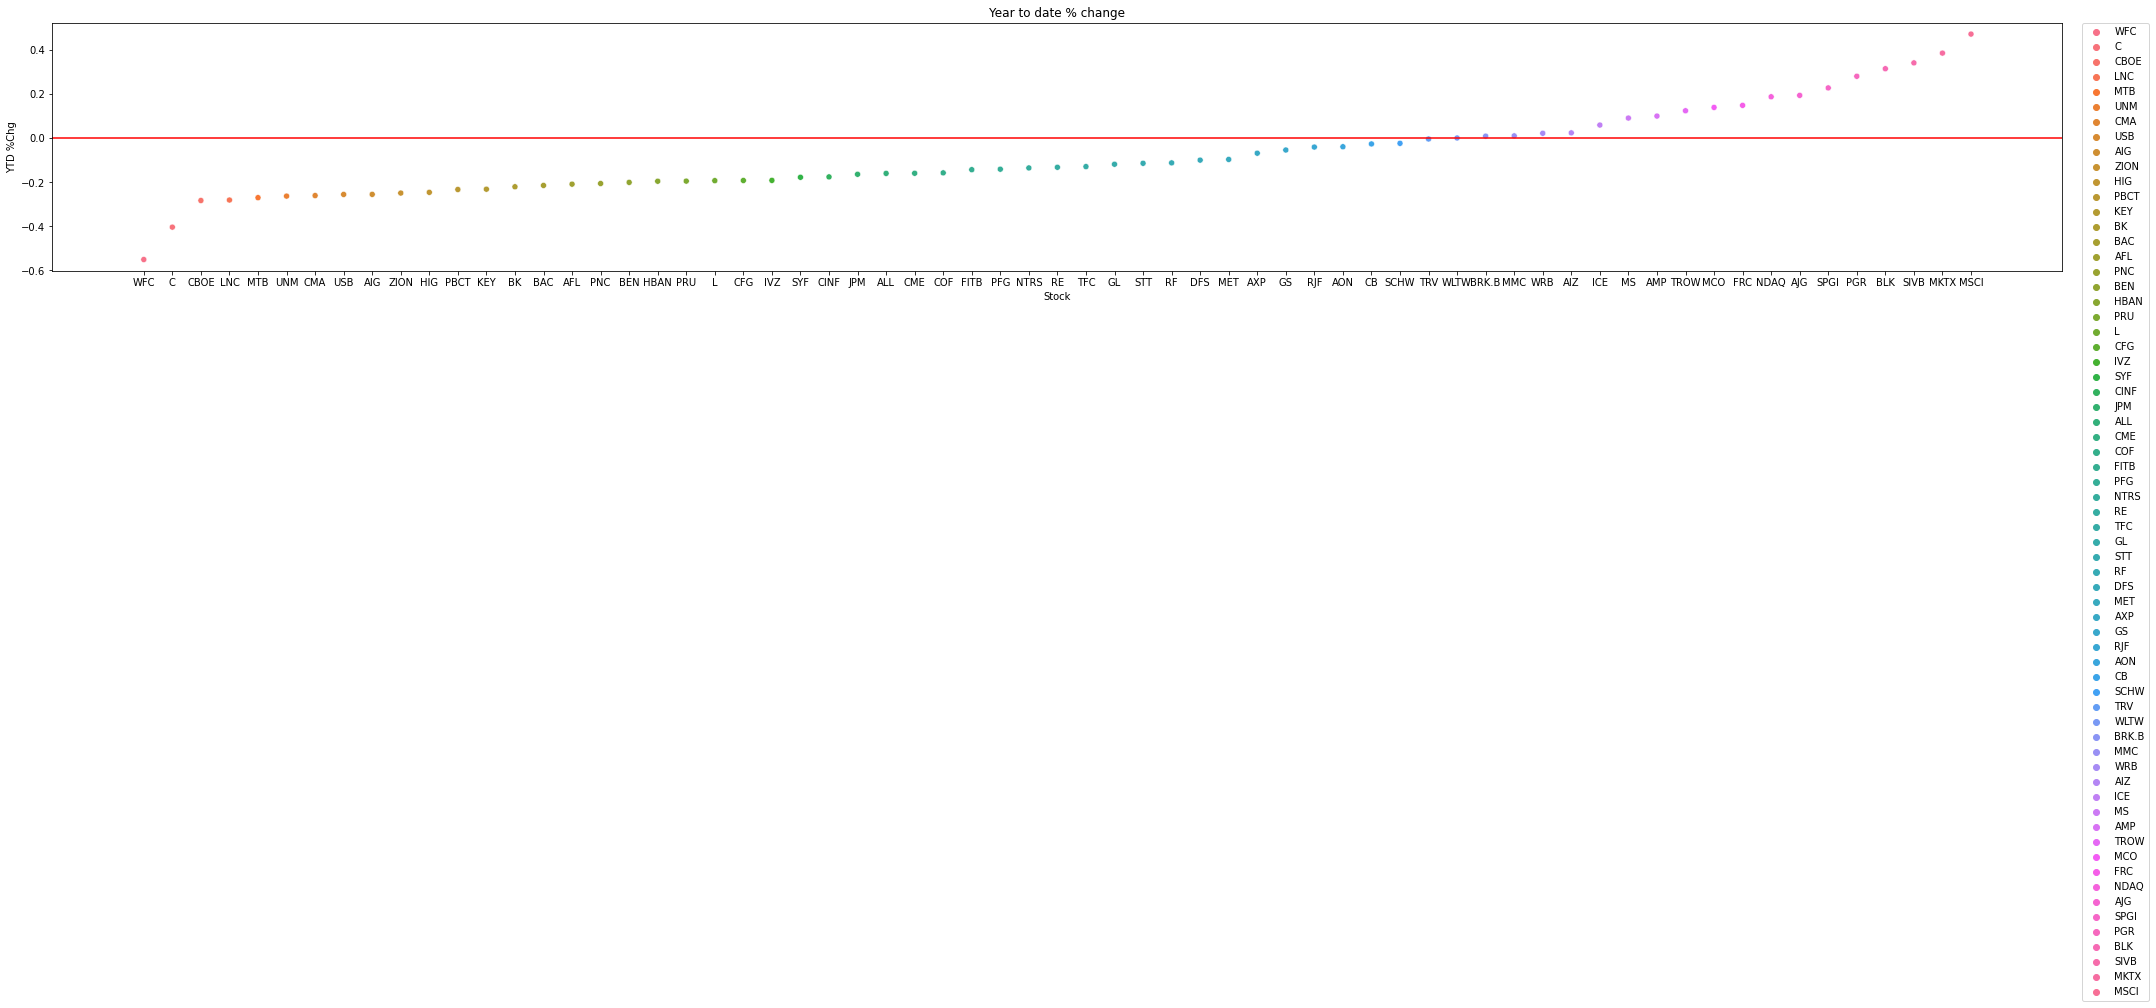

In [ ]:
# Show the %change annually for each stock
plt.figure(figsize=(30,10))

df1 = sample.sort_values(['YTD %Chg'])
sns.scatterplot(df1['Symbol'], df1['YTD %Chg'], hue=df1['Symbol'])
plt.xlabel('Stock')
plt.title('Year to date % change')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show

**The trend of this plot:**

* If the percentage change is negative, the stock's price went down in a year time range. If the percentage change is positive, this stock's price went up in a year time range. 
* If the percentage change is near 0, the stock's price is not changing much.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

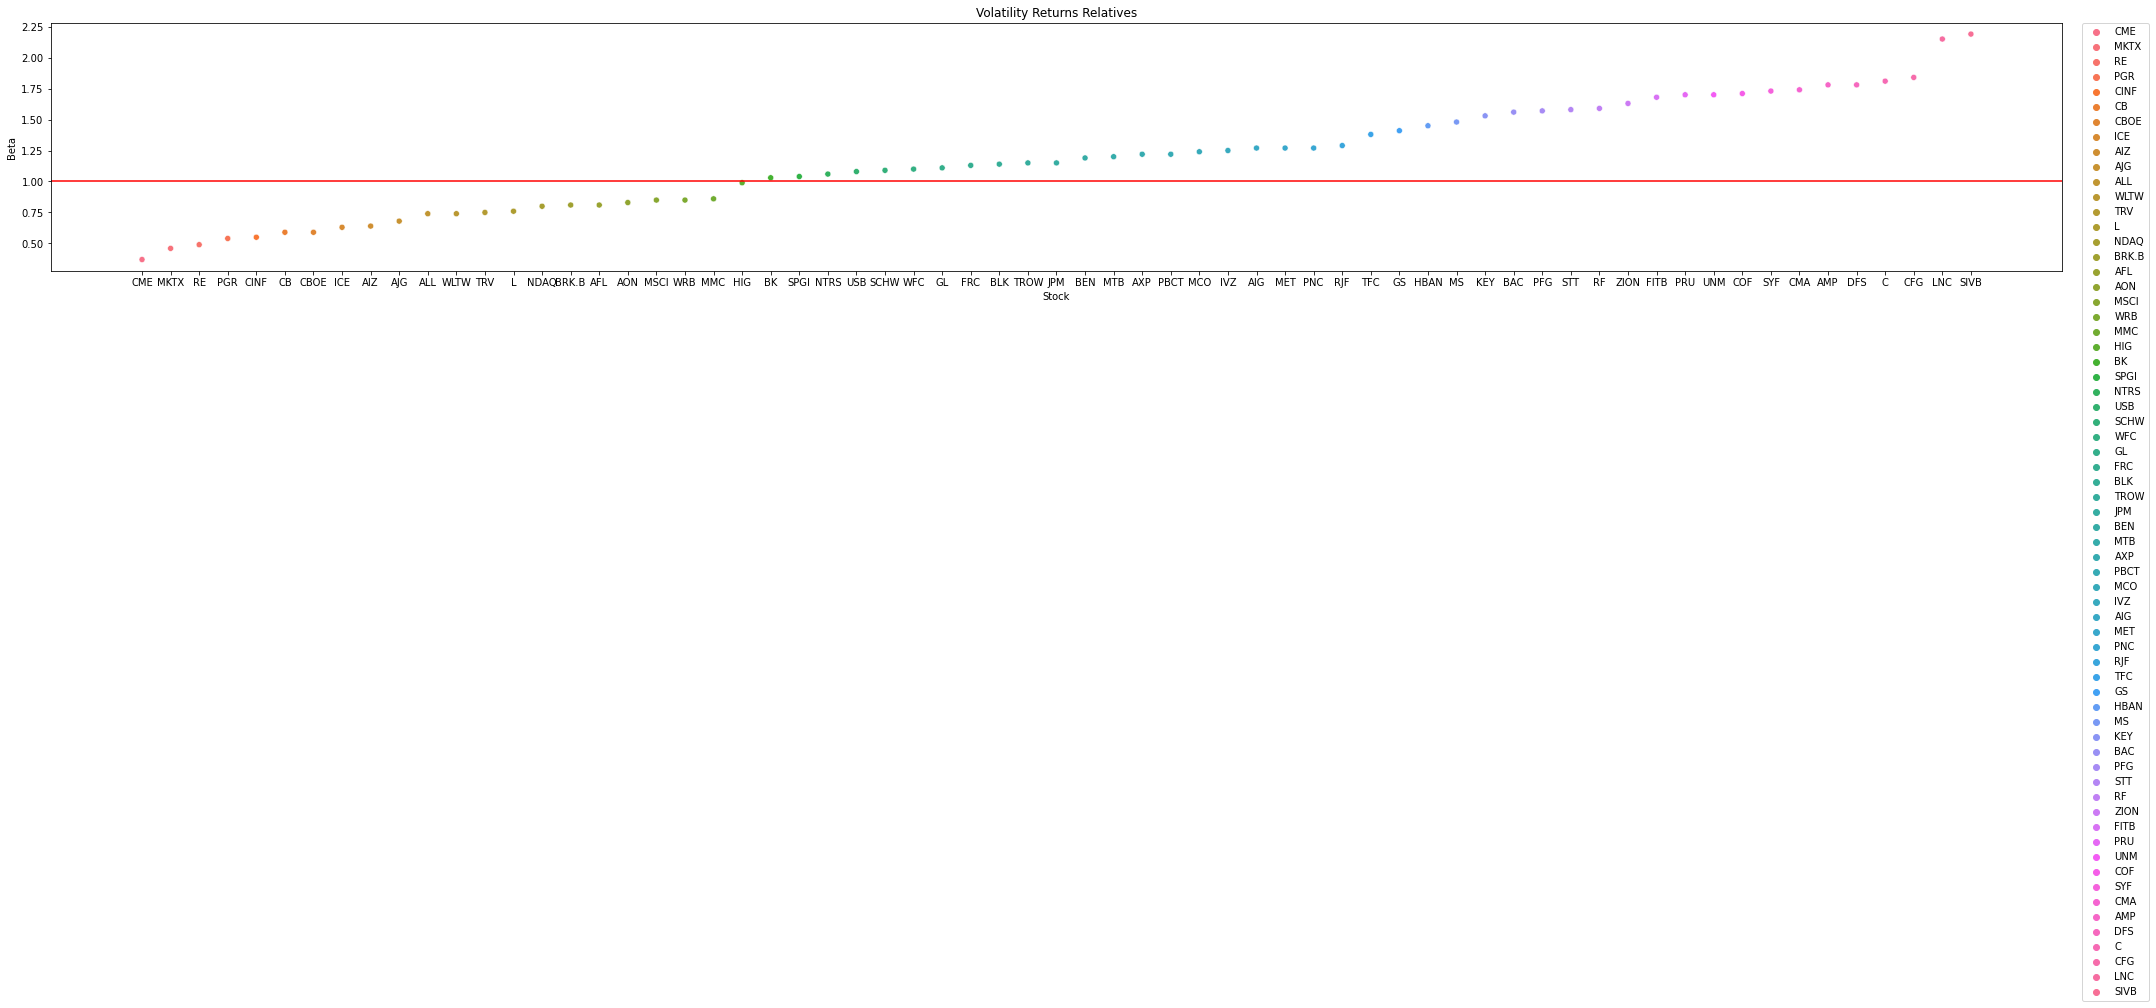

In [ ]:
# Compare the volatility sorted by the 'Beta'
plt.figure(figsize = (30,10))

df2 = sample.sort_values(['Beta'])
sns.scatterplot(df2['Symbol'], df2['Beta'], hue=df2['Symbol'])
plt.xlabel('Stock')
plt.title('Volatility Returns Relatives')
plt.axhline(y=1, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show

Meaning of Beta: High-beta stocks are supposed to be riskier but provide higher return potential; low-beta stocks pose less risk but also lower returns.

**The trend of this plot:**

* This graph shows the coefficient of returns and market. If a stock has a beta of 1.0, its price activity is strongly correlated with the market. If the beta is higher than 1, the stock is theoretically more volatile than the market. If a stock moves less than the market, the stock's beta is less than 1.0
* Majority of stocks have beta that is greater than or equal to 1. 


No handles with labels found to put in legend.


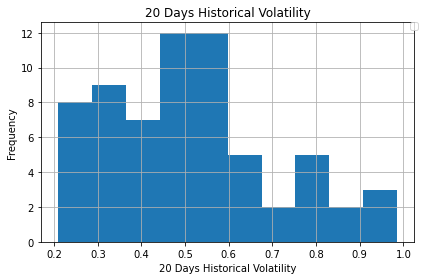

In [ ]:
# Frequency of 20 days historical volatility
sample.hist('20D His Vol')
plt.title('20 Days Historical Volatility')
plt.xlabel('20 Days Historical Volatility')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

**The trend of this plot:**

* Moving standard deviation show the relationship between actual value and mean value. The higher the standard deviation, the higher the volatility.
* For these S&P 500 companies' stocks, most of stocks have volatility not too high (under 0.6 in the 20 days range).
* Most of volatility of these stocks is around $Range(0.2, 0.6)$. Majority would lie into $Range(0.5,0.6)$


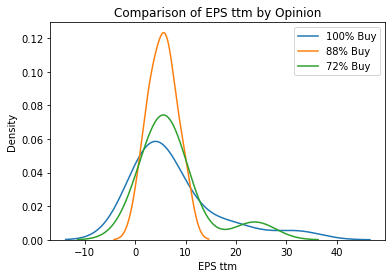

In [ ]:
# See different groups of stocks' EPS ttm
sns.kdeplot(sample.loc[sample.Opinion == "100% Buy",'EPS ttm'],label='100% Buy')
sns.kdeplot(sample.loc[sample.Opinion == "88% Buy",'EPS ttm'],label='88% Buy')
sns.kdeplot(sample.loc[sample.Opinion == "72% Buy",'EPS ttm'],label='72% Buy')
plt.title('Comparison of EPS ttm by Opinion')
plt.legend()
plt.show()

**The trend of this plot:**

* For daily buying opinion, majority of buying opinion would be the 88% buy opinion. Only few stocks' company financial performance is bad.
* Total earnings or profits the company has made over the last 12 months for these stocks lies intensively in $Range(0,10)$


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


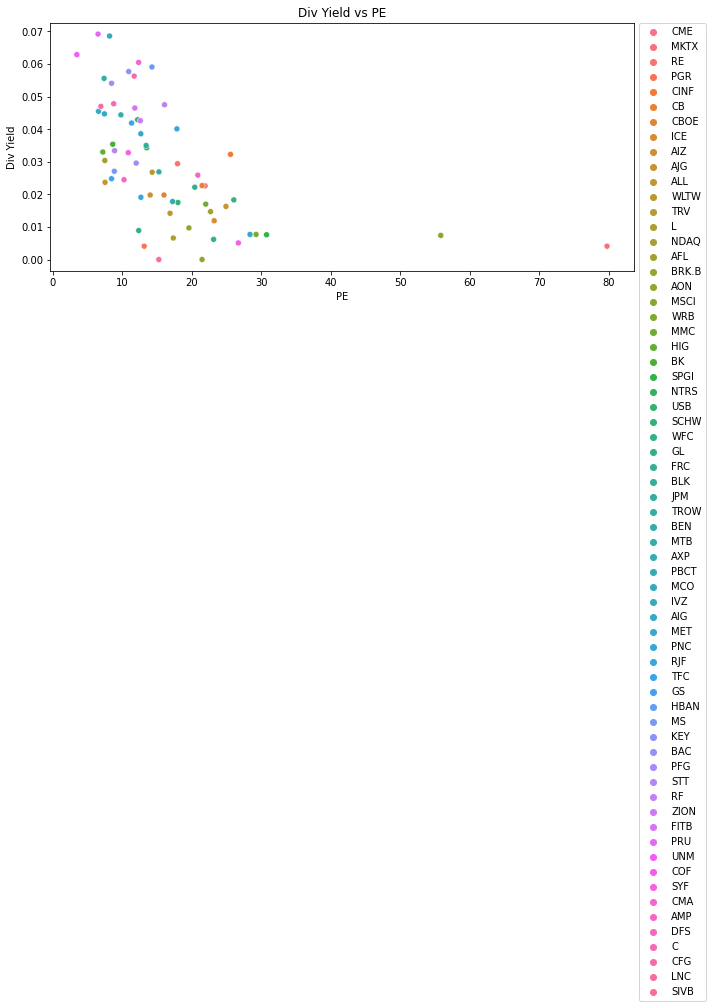

In [ ]:
#Compare the PE and income
plt.figure(figsize = (10,10))

df2 = sample.sort_values(['P/E ttm'])
sns.scatterplot(df2['P/E ttm'], df2['Div Yield'], hue=df1['Symbol'])
plt.xlabel('PE')
plt.title('Div Yield vs PE')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

plt.show()

**The trend of this plot:**

* Majority of price-to-sharing lies in the $ Range(5, 30)$.
* The correlation between P/E ttm and Dividend Yield is negative, which means when the price-to-earnings ratio goes up, the dividend yield goes down.


###*Reasons for picking the below mentioned 10 stocks*

* For earning money, we need to choose those stocks for which the year-to-date percentage change is at least positive, and higher the positive percentage change, the higher amount of money we would be able to make.
* Beta describes the relationship between systematic risk and expected return for stocks. When beta =1, the stock is highly correlated to market. 
* We have diversified our portfolio of stocks so that we don't lose much of our money even if the stock's performance goes down. 
* We need high return stocks and stable stocks to combine our set of 10 stocks. 

**Hence, we have chosen high return with high volatility stocks**: LNC;	SIVB; CFG; MKTX

**We have also chosen stable change with low return stocks**: BK;	SPGI;	HIG;	WRB;	AIZ; ICE	


In [ ]:
# Read the data: returns of stocks daily
df = pd.read_excel('/content/drive/Shareddrives/OPIM 5641 Project/Project 2/S&P Sectors_F.xlsx','Daily Return')
df.head()

,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,CFG,AIZ
0,-0.006931,-0.017921,-0.013390,-0.031658,-0.019790,-0.032264,-0.013818,-0.016570,-0.004589,-0.015982
1,0.031479,0.022844,0.056845,0.056792,0.028995,0.048002,0.030827,0.015445,0.041159,0.020189
2,0.011946,-0.030263,0.005211,0.023103,-0.002296,0.008011,-0.003625,0.002904,0.012334,0.003980
3,-0.000784,-0.016762,-0.008517,0.009852,-0.003766,0.009157,-0.013415,-0.007307,0.000000,0.001211
4,-0.016383,0.004019,0.024633,0.017821,0.002940,-0.008959,0.008758,0.002778,0.013121,0.006159


In [ ]:
# Show the detail and check non-null value for the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MKTX    251 non-null    float64
 1   ICE     251 non-null    float64
 2   LNC     251 non-null    float64
 3   SIVB    251 non-null    float64
 4   BK      251 non-null    float64
 5   SPGI    251 non-null    float64
 6   HIG     251 non-null    float64
 7   WRB     251 non-null    float64
 8   CFG     251 non-null    float64
 9   AIZ     251 non-null    float64
dtypes: float64(10)
memory usage: 19.7 KB


In [ ]:
# different mathmathics of all stocks
df.describe()

,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,CFG,AIZ
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.002589,0.000925,0.000818,0.001229,0.000429,0.002009,0.001474,0.001586,0.001419,0.001646
std,0.019319,0.010234,0.018787,0.021910,0.014213,0.012375,0.009743,0.010303,0.016112,0.011407
min,-0.118526,-0.030263,-0.084481,-0.070606,-0.095247,-0.038472,-0.037818,-0.043153,-0.045373,-0.030752
25%,-0.004810,-0.004998,-0.008024,-0.011036,-0.005545,-0.004841,-0.003279,-0.003998,-0.006723,-0.004312
50%,0.004852,0.002125,0.002464,0.002454,0.001241,0.002669,0.002131,0.001667,0.002603,0.001769
75%,0.012336,0.007791,0.011269,0.013391,0.008516,0.008802,0.006954,0.007385,0.010991,0.008529
max,0.059107,0.029009,0.056845,0.060124,0.056937,0.050092,0.049713,0.059248,0.063836,0.075344


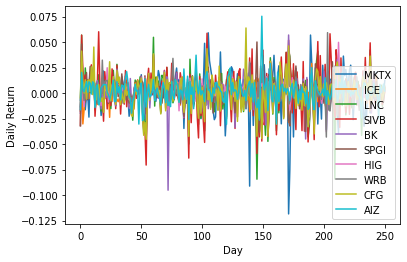

In [ ]:
# see what it looks like... messy... some volatility here!
df.plot()
plt.xlabel('Day')
plt.ylabel('Daily Return')
plt.show() # get rid of funky text

In [ ]:
# Give the average returns and standard diviation
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
MKTX    0.002589
ICE     0.000925
LNC     0.000818
SIVB    0.001229
BK      0.000429
SPGI    0.002009
HIG     0.001474
WRB     0.001586
CFG     0.001419
AIZ     0.001646
      Std_Dev_Return
MKTX        0.019281
ICE         0.010214
LNC         0.018749
SIVB        0.021866
BK          0.014185
SPGI        0.012351
HIG         0.009724
WRB         0.010283
CFG         0.016080
AIZ         0.011384


In [ ]:
# here's the covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,CFG,AIZ
MKTX,0.000373,0.000104,-0.000034,-0.000060,-0.000011,0.000111,0.000047,0.000050,-0.000037,0.000034
ICE,0.000104,0.000105,0.000025,0.000008,0.000019,0.000073,0.000040,0.000047,0.000016,0.000038
LNC,-0.000034,0.000025,0.000353,0.000327,0.000158,0.000055,0.000093,0.000053,0.000240,0.000082
SIVB,-0.000060,0.000008,0.000327,0.000480,0.000193,0.000069,0.000072,0.000043,0.000290,0.000071
BK,-0.000011,0.000019,0.000158,0.000193,0.000202,0.000050,0.000057,0.000037,0.000141,0.000051
SPGI,0.000111,0.000073,0.000055,0.000069,0.000050,0.000153,0.000053,0.000054,0.000042,0.000054
HIG,0.000047,0.000040,0.000093,0.000072,0.000057,0.000053,0.000095,0.000061,0.000064,0.000060
WRB,0.000050,0.000047,0.000053,0.000043,0.000037,0.000054,0.000061,0.000106,0.000032,0.000055
CFG,-0.000037,0.000016,0.000240,0.000290,0.000141,0.000042,0.000064,0.000032,0.000260,0.000055
AIZ,0.000034,0.000038,0.000082,0.000071,0.000051,0.000054,0.000060,0.000055,0.000055,0.000130


In [ ]:
Corr_matrix = df.corr()
Corr_matrix

,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,CFG,AIZ
MKTX,1.000000,0.526822,-0.092723,-0.142104,-0.038961,0.463855,0.251813,0.250438,-0.119980,0.153562
ICE,0.526822,1.000000,0.127740,0.037387,0.127845,0.577428,0.396891,0.450156,0.098032,0.323139
LNC,-0.092723,0.127740,1.000000,0.793243,0.589975,0.236019,0.507052,0.275723,0.792329,0.380358
SIVB,-0.142104,0.037387,0.793243,1.000000,0.619363,0.253477,0.338105,0.188338,0.820166,0.285009
BK,-0.038961,0.127845,0.589975,0.619363,1.000000,0.282953,0.414530,0.253947,0.614042,0.313716
SPGI,0.463855,0.577428,0.236019,0.253477,0.282953,1.000000,0.440464,0.425710,0.212425,0.382433
HIG,0.251813,0.396891,0.507052,0.338105,0.414530,0.440464,1.000000,0.605748,0.404879,0.544227
WRB,0.250438,0.450156,0.275723,0.188338,0.253947,0.425710,0.605748,1.000000,0.195095,0.466176
CFG,-0.119980,0.098032,0.792329,0.820166,0.614042,0.212425,0.404879,0.195095,1.000000,0.298697
AIZ,0.153562,0.323139,0.380358,0.285009,0.313716,0.382433,0.544227,0.466176,0.298697,1.000000


In [ ]:
# creating covariance table on stock return dataframe
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
          MKTX       ICE       LNC  ...       WRB       CFG       AIZ
MKTX  0.000373  0.000104 -0.000034  ...  0.000050 -0.000037  0.000034
ICE   0.000104  0.000105  0.000025  ...  0.000047  0.000016  0.000038
LNC  -0.000034  0.000025  0.000353  ...  0.000053  0.000240  0.000082
SIVB -0.000060  0.000008  0.000327  ...  0.000043  0.000290  0.000071
BK   -0.000011  0.000019  0.000158  ...  0.000037  0.000141  0.000051
SPGI  0.000111  0.000073  0.000055  ...  0.000054  0.000042  0.000054
HIG   0.000047  0.000040  0.000093  ...  0.000061  0.000064  0.000060
WRB   0.000050  0.000047  0.000053  ...  0.000106  0.000032  0.000055
CFG  -0.000037  0.000016  0.000240  ...  0.000032  0.000260  0.000055
AIZ   0.000034  0.000038  0.000082  ...  0.000055  0.000055  0.000130

[10 rows x 10 columns]


Average Return:
MKTX    0.002589
ICE     0.000925
LNC     0.000818
SIVB    0.001229
BK      0.000429
SPGI    0.002009
HIG     0.001474
WRB     0.001586
CFG     0.001419
AIZ     0.001646

## **Model**

We have used the Womack’s Portfolio example as a reference for our model. The minimum return is set to 1.5%. The risk limit is set from 0.00001 to 0.0003 and the risk level cannot exceed 0.0003. Instead of just limiting our risk to these two values, we also incorporated the step size of 0.000005.

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
m.MKTX = Var(within=NonNegativeReals, bounds=(0,1))
m.ICE = Var(within=NonNegativeReals, bounds=(0,1))
m.LNC = Var(within=NonNegativeReals, bounds=(0,1))
m.SIVB = Var(within=NonNegativeReals, bounds=(0,1))
m.BK = Var(within=NonNegativeReals, bounds=(0,1))
m.SPGI = Var(within=NonNegativeReals, bounds=(0,1))
m.HIG = Var(within=NonNegativeReals, bounds=(0,1))
m.WRB = Var(within=NonNegativeReals, bounds=(0,1))
m.CFG = Var(within=NonNegativeReals, bounds=(0,1))
m.AIZ = Var(within=NonNegativeReals, bounds=(0,1))

# declare objective
m.objective = Objective(expr =               
                        m.MKTX*df_return[0] + 
                        m.ICE*df_return[1] + 
                        m.LNC*df_return[2] +
                        m.SIVB*df_return[3] + 
                        m.BK*df_return[4]+
                        m.SPGI*df_return[5]+
                        m.HIG*df_return[6]+
                        m.WRB*df_return[7]+
                        m.CFG*df_return[8]+
                        m.AIZ*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.MKTX + m.ICE + m.LNC + m.SIVB + m.BK + 
                               m.SPGI + m.HIG + m.WRB + m.CFG + m.AIZ== 1)


In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0003
max_risk = 0.0003
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [m.MKTX, m.ICE, m.LNC, m.SIVB, m.BK, m.SPGI, m.HIG, m.WRB, m.CFG, m.AIZ]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits. This is what psioptparam() does.
# risk_limits = [0.001, 0.003] # this is just two options

# this is a sequence of options - better!
risk_limits = np.arange(0.00001, 0.0003, 0.000005) # take tiny steps (for step)
risk_limits

array([1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05, 3.00e-05, 3.50e-05,
       4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05, 6.00e-05, 6.50e-05,
       7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05, 9.00e-05, 9.50e-05,
       1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04, 1.20e-04, 1.25e-04,
       1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04, 1.50e-04, 1.55e-04,
       1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04, 1.80e-04, 1.85e-04,
       1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04, 2.10e-04, 2.15e-04,
       2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04, 2.40e-04, 2.45e-04,
       2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04, 2.70e-04, 2.75e-04,
       2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04])

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.MKTX(), m.ICE(), m.LNC(), m.SIVB(), m.BK(), m.SPGI(), m.HIG(), m.WRB(), m.CFG(), m.AIZ()]
  # store our returns
  returns[r] =  m.MKTX()*df_return[0] + m.ICE()*df_return[1] + m.LNC()*df_return[2] + m.SIVB()*df_return[3] + m.BK()*df_return[4] +m.SPGI()*df_return[5]+m.HIG()*df_return[6]+m.WRB()*df_return[7]+m.CFG()*df_return[8]+m.AIZ()*df_return[9]

    model=unknown;
        message from solver=Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.036087751388549805
# -------------------------

## **Parameter Analysis**

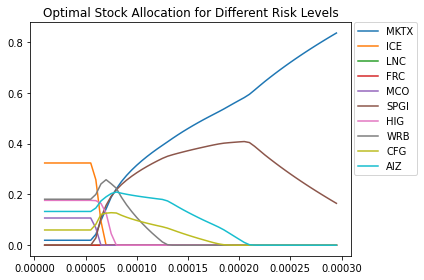

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['MKTX',	'ICE',	'LNC',	'FRC',	'MCO',	'SPGI',	'HIG',	'WRB',	'CFG',	'AIZ']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[1e-05, 1.5000000000000002e-05, 2.0000000000000005e-05, 2.5000000000000005e-05, 3.0000000000000004e-05, 3.5000000000000004e-05, 4.000000000000001e-05, 4.500000000000001e-05, 5.000000000000001e-05, 5.500000000000001e-05, 6.000000000000001e-05, 6.500000000000002e-05, 7.000000000000002e-05, 7.500000000000002e-05, 8.000000000000002e-05, 8.500000000000002e-05, 9.000000000000002e-05, 9.500000000000002e-05, 0.00010000000000000002, 0.00010500000000000002, 0.00011000000000000002, 0.00011500000000000003, 0.00012000000000000003, 0.00012500000000000003, 0.00013000000000000004, 0.00013500000000000003, 0.00014000000000000004, 0.00014500000000000003, 0.00015000000000000004, 0.00015500000000000003, 0.00016000000000000004, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000004, 0.00018500000000000005, 0.00019000000000000004, 0.00019500000000000005, 0.00020000000000000004, 0.00020500000000000005, 0.00021000000000000004, 0.00021500000000000005, 0.000220000000000000

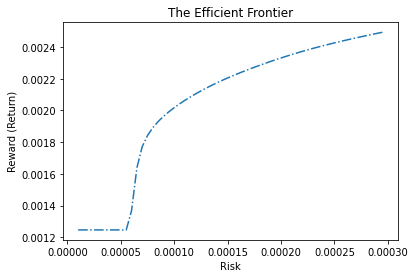

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

##Analysis

Change daily price to monthly price, we check the total earnings for each month and calculate the monthly $ difference to draw the plot.



### Table for Monthly Close Price in Year 2020

In [ ]:
month = pd.read_excel('/content/drive/Shareddrives/OPIM 5641 Project/Project 2/S&P Sectors_F.xlsx','Monthly Price')
month_price = pd.DataFrame(month)
index = ['Jan, 1', 'Feb, 1', 'Mar, 1', 'Apr, 1','May, 1', 'Jun, 1', 'Jul, 1', 'Aug, 1', 'Sep, 1', 'Oct, 1']
month_price.insert(0, "Month", index, True) 
month_price

,Month,CFG,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,AIZ
0,"Jan, 1",35.197262,352.357758,98.764503,51.650772,240.330002,43.355965,291.879700,57.963779,73.105934,128.510818
1,"Feb, 1",30.228991,322.661377,88.347404,43.326469,208.160004,38.887539,264.234894,48.840939,66.752792,118.697296
2,"Mar, 1",17.942799,331.441711,79.960236,25.123434,151.080002,32.825371,244.068466,34.674435,51.869125,102.914246
3,"Apr, 1",21.357750,453.466339,88.895996,33.857456,193.169998,36.587425,291.706879,37.380299,53.786690,105.039963
4,"May, 1",23.395706,506.864502,96.647690,36.655933,214.750000,36.543606,323.718109,37.675484,57.721085,101.421303
5,"Jun, 1",24.502390,499.814331,91.032677,35.554234,215.529999,37.998665,328.866821,38.248177,57.063694,102.763779
6,"Jul, 1",24.084955,515.559448,96.490990,36.018105,224.270004,35.245846,349.598145,41.988659,61.632156,106.922485
7,"Aug, 1",25.514244,484.867401,105.912773,35.239304,255.380005,36.667889,365.738068,40.133301,61.931583,120.940697
8,"Sep, 1",24.932356,481.091095,99.751228,30.625448,240.619995,34.050171,360.600006,36.860001,61.033302,121.309998
9,Oct，1,26.875265,538.291748,94.400002,34.310665,290.700012,34.070004,322.730011,38.520000,60.119999,124.370003


### Portfolio Monthly Value Table at a Specific Risk Level

In [ ]:
# Return the close price into returns monthly
ticks = ['MKTX',	'ICE',	'LNC',	'SIVB',	'BK',	'SPGI',	'HIG',	'WRB',	'CFG',	'AIZ']
return_data = pd.DataFrame()
for i in ticks:
  return_data[i] = month_price[i].pct_change()
return_data

,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,CFG,AIZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.084279,-0.105474,-0.161165,-0.133858,-0.103064,-0.094713,-0.157389,-0.086903,-0.141155,-0.076363
2,0.027212,-0.094934,-0.420137,-0.274212,-0.155890,-0.076320,-0.290054,-0.222967,-0.406437,-0.132969
3,0.368163,0.111753,0.347644,0.278594,0.114608,0.195185,0.078036,0.036969,0.190324,0.020655
4,0.117756,0.087200,0.082655,0.111715,-0.001198,0.109738,0.007897,0.073148,0.095420,-0.034450
5,-0.013909,-0.058098,-0.030055,0.003632,0.039817,0.015905,0.015201,-0.011389,0.047303,0.013237
6,0.031502,0.059960,0.013047,0.040551,-0.072445,0.063039,0.097795,0.080059,-0.017036,0.040469
7,-0.059532,0.097644,-0.021622,0.138717,0.040346,0.046167,-0.044187,0.004858,0.059344,0.131106
8,-0.007788,-0.058176,-0.130929,-0.057796,-0.071390,-0.014048,-0.081561,-0.014504,-0.022806,0.003054
9,0.118898,-0.053646,0.120332,0.208129,0.000582,-0.105019,0.045035,-0.014964,0.077927,0.025225


**Analyzing Monthly $ Change for the final stocks**

We used excel to calculate the value of our portfolio. We choose 0.00006 as our risk level.


In [ ]:
portfolioanalysis = pd.read_excel('/content/drive/Shareddrives/OPIM 5641 Project/Project 2/S&P Sectors_F.xlsx', "Table of portfolio value")
portfolioanalysis

,Month,CFG,MKTX,ICE,LNC,SIVB,BK,SPGI,HIG,WRB,AIZ,Total Earning,Value_Change
0,Jan,42817.000000,257598.400000,0.602915,1.043015,67385.400000,28438.670000,175354.000000,199885.000000,82201.000000,146320.000000,1.000001e+06,0.000000
1,Feb,39208.426057,230428.466358,0.505746,0.903399,60440.391134,25745.158248,147755.209294,182514.393845,70597.917845,135146.565840,8.918379e+05,-108163.178200
2,Mar,40275.365747,208552.970333,0.293263,0.655676,51018.338560,23780.287771,104898.219817,141819.706993,41904.311910,117176.262127,7.294264e+05,-162411.525600
3,Apr,55103.265226,231859.390427,0.395215,0.838344,56865.448306,28421.843239,113084.057299,147062.639740,49879.708170,119596.537821,8.018741e+05,72447.711590
4,May,61592.005326,252077.529272,0.427881,0.931999,56797.323499,31540.799473,113977.082100,157819.977712,54639.229923,115476.437093,8.439217e+05,42047.620490
5,Jun,60735.322124,237432.328976,0.415021,0.935384,59058.822529,32042.455888,115709.647725,156022.565986,57223.829416,117004.998691,8.352313e+05,-8690.422538
6,Jul,62648.606242,251668.771422,0.420436,0.973315,54780.306131,34062.380265,127025.472724,168513.576596,56248.964258,121740.073983,8.766895e+05,41458.223630
7,Aug,58919.009415,276242.716938,0.411345,1.108330,56990.472362,35634.938175,121412.598161,169332.215551,59587.002793,137700.928123,9.158214e+05,39131.855820
8,Sep,58460.148170,260172.020638,0.357488,1.044273,52921.922540,35134.338563,111510.065242,166876.221097,58228.061608,138121.466757,8.814256e+05,-34395.754820
9,Oct,65410.942867,246214.832419,0.400505,1.261617,52952.723099,31444.565462,116531.921030,164379.085324,62765.599765,141605.580756,8.813069e+05,-118.733532


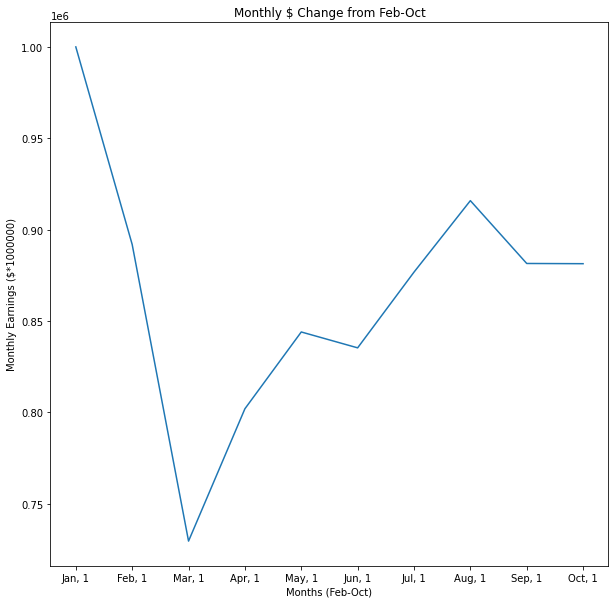

In [ ]:
plt.figure(figsize=(10,10))
a = portfolioanalysis.iloc[:,11].values
plot(portfolioanalysis['Month'], a)
plt.xticks(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
           ['Jan, 1', 'Feb, 1', 'Mar, 1', 'Apr, 1','May, 1', 'Jun, 1', 'Jul, 1', 'Aug, 1', 'Sep, 1', 'Oct, 1'])
plt.xlabel("Months (Feb-Oct)")
plt.ylabel("Monthly Earnings ($*1000000)")
plt.title("Monthly $ Change from Feb-Oct")
plt.show()

## **Conclusion**:

* It's important for investors to keep in mind that higher dividend yields do not always indicate attractive investment opportunities because the dividend yield of a stock may be elevated as the result of a declining stock price.
* Risk level can determine the rewards of portfolio returns.
* After a specific risk level, the reward of the specific set of stocks will go up. 
* If we use a larger risk limit range with high step value to pick allocation of stocks, we only get those stocks that perform the best and not those stocks which have very small daily returns. This is not acceptable.  So, we need to narrow our risk limit with smaller step values.
* When stocks with high beta value are exchanged with low beta value stocks, then the different combinations of stocks were leading to strange expected reward trends, i.e., the risk level for these stocks was going up, and the high beta stocks were showing very low rewards. So, in order to fix this issue and get a better plot, we carefully picked our stocks so that we have reasonable returns.
* As can be seen from the last plot,i.e., Monthly $ change(Feb-Oct), from Feb to April, we are losing money. But, from April onwards, we see an upward trend and thus we are gaining money. We lost a bit of money from May to June. Again from June to August, we are in a stable and earning position.
* Keeping an eye for stock’s performance history is vital in determining the selection of stocks. We cannot decide on which stocks to add in our portfolio based on one day's performance and the closing stock price or the percentage of buy. Historical returns should be analyzed before investing in stocks to see how they might react to a future situation such as a pandemic. 
* During the pandemic, we can probably buy stocks that are less volatile so that we have a stable return.


